### 数据集

In [1]:
# 导入必要的库
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, Subset
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

import os
from PIL import Image # pip install Pillow

In [2]:
class Flowers(Dataset):
    def __init__(self, data_dir, transform=None):
        self.image_paths = []
        self.labels = []
        self.transform = transform
        
        # 遍历数据集目录，获取所有图像文件的路径和标签
        for filename in sorted(os.listdir(data_dir)):
            image_path = os.path.join(data_dir, filename)
            label = int(filename.split('_')[0])
            self.image_paths.append(image_path)
            self.labels.append(label)
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        # 加载图像数据和标签
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        
        # 对图像数据进行转换
        if self.transform:
            image = self.transform(image)
        
        # 将标签转换为PyTorch张量
        label = torch.tensor(label, dtype=torch.long)
        
        return image, label

In [3]:
# 定义绘图函数，传入dataset即可
def plot(dataset, shuffle=True, cmap=None):
    # 创建数据加载器
    dataloader = DataLoader(dataset, batch_size=4, shuffle=shuffle)
    
    # 取出一组数据
    images, labels = next(iter(dataloader))
    
    # 将通道维度(C)移到最后一个维度，方便使用matplotlib绘图
    images = np.transpose(images, (0, 2, 3, 1))  

    # 创建2x2的子图对象
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))

    # 遍历每个子图，绘制图像并添加子图标题
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap=cmap)
        ax.axis('off') # 隐藏坐标轴

        if hasattr(dataset, 'classes'): # 如果数据集有预定义的类别名称，使用该名称作为子图标题
            ax.set_title(dataset.classes[labels[i]], fontsize=12)
        else: # 否则使用类别索引作为子图标题
            ax.set_title(labels[i], fontsize=12)

    plt.show()

In [4]:
# 定义一个测试函数，接收transform和cmap参数并显示图像
# 其中cmap是指colormap，可以将数值映射成不同的颜色
def show_flowers(transform, cmap=None):
    # 使用Flowers数据集类加载数据集，传入路径及transform参数
    dataset = Flowers('./dataset/flower_color/flowers/flowers', transform = transform)
    # 使用Subset对原始数据集进行划分，只划分为前4个样本便于查看
    subset = Subset(dataset, [i for i in range(4)])
    # 使用自定义的plot函数对划分的数据集进行可视化显示
    plot(dataset, False, cmap)

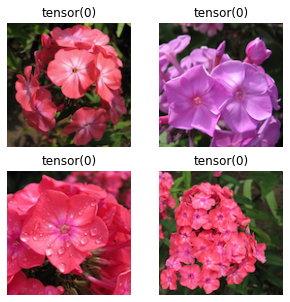

In [5]:
# 定义数据转换方法
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.ToTensor(),  # 将数据转换为张量
])
# 读取数据集并显示
dataset = Flowers('./dataset/flower_color/flowers/flowers', transform = transform)
show_flowers(transform)

### 调整图像大小

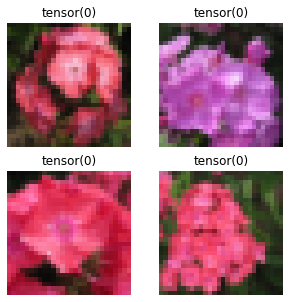

In [6]:
transform = transforms.Compose([
    transforms.Resize((28, 28)), # 调整图像大小为28x28，对应(h, w)
    transforms.ToTensor(),  # 将数据转换为张量
])
show_flowers(transform)

### 灰度图

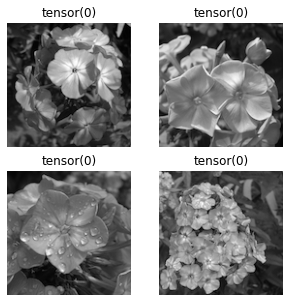

In [7]:
transform = transforms.Compose([
    transforms.Grayscale(), # 调整图像为灰度图，通道数变为1
    transforms.ToTensor(),  # 将数据转换为张量
])
show_flowers(transform, cmap='gray')

### 标准化

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


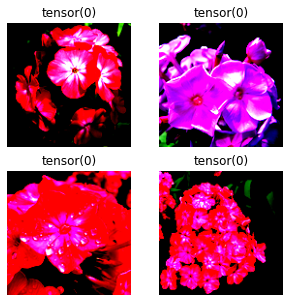

In [8]:
# 标准化后的图像数据具有零均值和单位方差，可以提高神经网络的训练速度和精度，同时也可以减少训练过程中的梯度爆炸和梯度消失等问题
transform = transforms.Compose([
    transforms.ToTensor(),  # 将数据转换为张量
    # 对三通道数据进行归一化(均值，标准差)，数值是从ImageNet数据集上的百万张图片中随机抽样计算得到
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
show_flowers(transform)

### 随机旋转

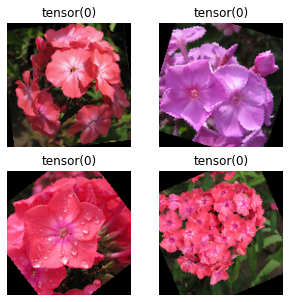

In [9]:
transform = transforms.Compose([
    transforms.RandomRotation(degrees=90), # 随机旋转(-90, 90)度
    transforms.ToTensor(),  # 将数据转换为张量
])
show_flowers(transform)

### 中心裁剪

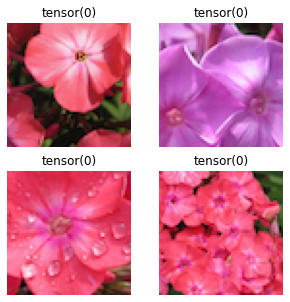

In [10]:
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.CenterCrop(64), # 从中心位置开始裁剪指定大小
    transforms.ToTensor(),  # 将数据转换为张量
])
show_flowers(transform)

### 随机裁剪

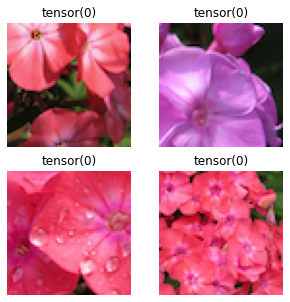

In [11]:
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.RandomCrop(64), # 从随机位置开始裁剪指定大小
    transforms.ToTensor(),  # 将数据转换为张量
])
show_flowers(transform)

### 高斯模糊

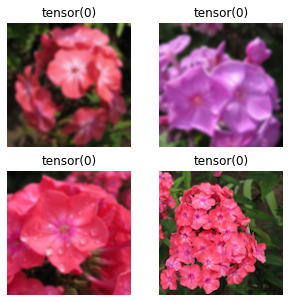

In [12]:
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.GaussianBlur((5, 5)), # 对图像进行高斯模糊处理，高斯核大小为5x5
    transforms.ToTensor(),  # 将数据转换为张量
])
show_flowers(transform)

### 亮度、对比度、饱和度、色调调节

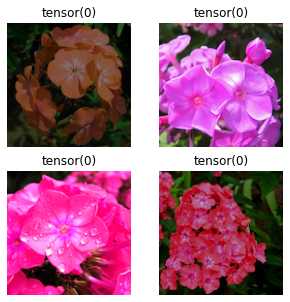

In [13]:
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.ColorJitter( # 色彩随机调节
        brightness=(0.5, 1.5), # 亮度
        contrast=(0.5, 1.5), # 对比度
        saturation=(0.5, 1.5), # 饱和度
        hue=(-0.1, 0.1) # 色调
    ), 
    transforms.ToTensor(),  # 将数据转换为张量
])
show_flowers(transform)

### 水平翻转

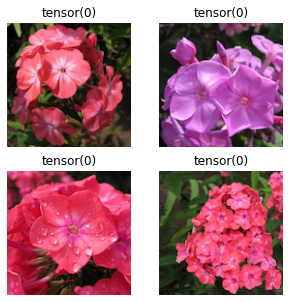

In [14]:
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.RandomHorizontalFlip(p = 1), # 随机水平翻转
    transforms.ToTensor(),  # 将数据转换为张量
])
show_flowers(transform)

### 垂直翻转

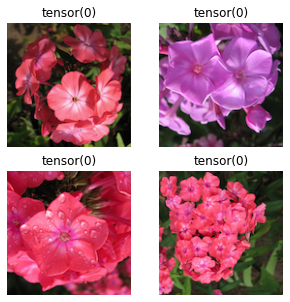

In [15]:
transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.RandomVerticalFlip(p = 1), # 随机垂直翻转
    transforms.ToTensor(),  # 将数据转换为张量
])
show_flowers(transform)

### 自定义方法

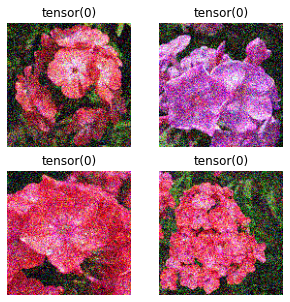

In [16]:
# 自定义AddNoise方法，用于向输入图像中添加噪声
class AddNoise():
    def __init__(self, noise_factor=0.2): # 噪声系数
        self.noise_factor = noise_factor

    def __call__(self, image):
        noisy = image + torch.randn_like(image) * self.noise_factor # 向输入图像中添加随机噪声
        noisy = torch.clamp(noisy, 0.0, 1.0) # 将噪声图像像素值限制在[0, 1]之间
        return noisy

transform = transforms.Compose([
    transforms.Resize((128, 128)), # 调整图像大小为128x128
    transforms.ToTensor(),  # 将数据转换为张量
    AddNoise(), # 自定义方法，添加噪点
])
show_flowers(transform)